In [2]:
import xarray as xr # reads and handles netcdf files with metadata
import numpy as np   # module for numerical computing
import pandas as pd # module for data manipulation and analysis
import geopandas as gpd
import matplotlib.pyplot as plt  #essential for plotting
import cartopy.crs as ccrs #important for  map projections
import netCDF4 as nc

In [3]:
path1 = "C:/Users/user/Downloads/Met_data/T_RH_q_S_Korea_1970-2020_monthly.nc"
data2 = xr.open_dataset(path1)
temp = data2['t']
spatial_mean_temp = temp.mean(dim=['latitude','longitude'])
spatial_mean_temp = spatial_mean_temp[:,1]

yearly_mean_temp = spatial_mean_temp.resample(time='1Y').mean()
years1 = yearly_mean_temp['time.year']
decadal_mean_temp = yearly_mean_temp.rolling(time=10,center=True).mean()
decadal_mean_temp
years = yearly_mean_temp['time.year']
years

<xarray.DataArray 'year' (time: 51)>
array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)
Coordinates:
    level    int32 1000
  * time     (time) datetime64[ns] 1970-12-31 1971-12-31 ... 2020-12-31

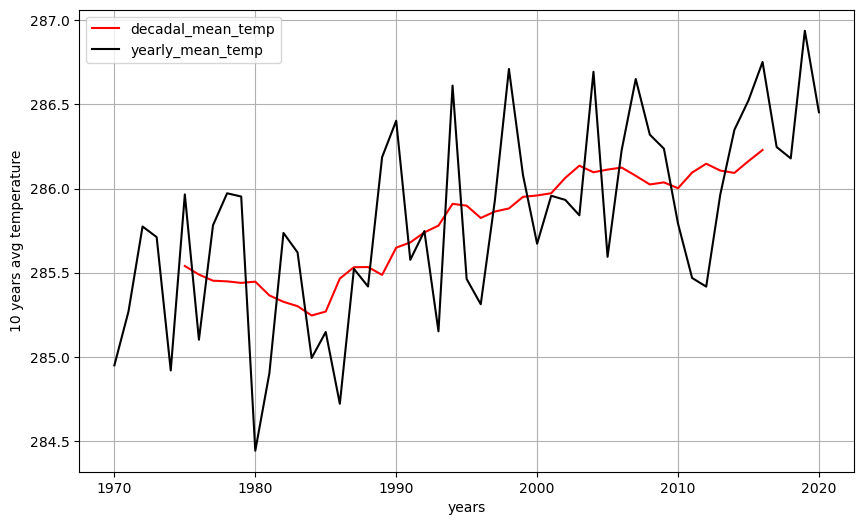

In [4]:
plt.figure(figsize=(10,6))
plt.plot(years,decadal_mean_temp,label="decadal_mean_temp",color='red')
plt.plot(years,yearly_mean_temp,label="yearly_mean_temp",color='black')
plt.xlabel("years")
plt.ylabel("10 years avg temperature")
plt.legend()
plt.grid(True)
plt.show()

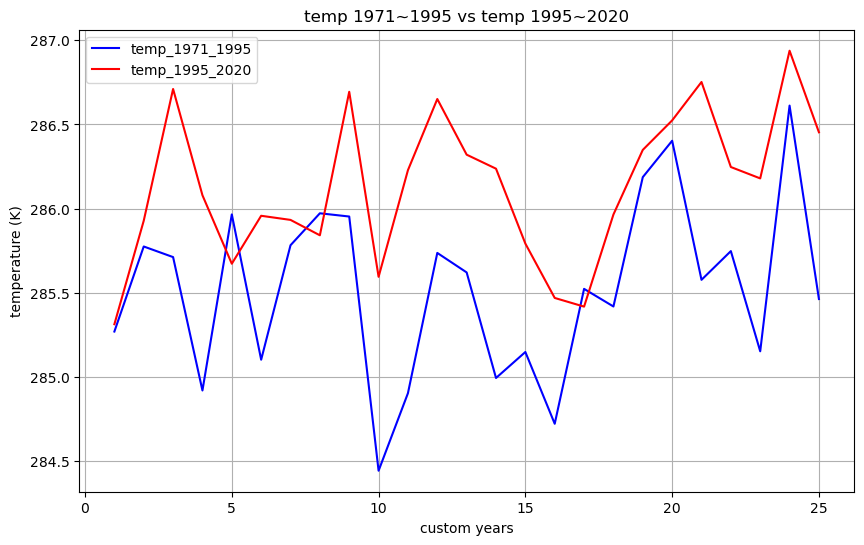

In [10]:
temp_1971_1995 = yearly_mean_temp[1:26]
temp_1995_2020 = yearly_mean_temp[26:51]
custom_years = np.arange(1,26)
plt.figure(figsize=(10,6))
plt.plot(custom_years,temp_1971_1995,label="temp_1971_1995",color='blue')
plt.plot(custom_years,temp_1995_2020,label="temp_1995_2020",color='red')
plt.title("temp 1971~1995 vs temp 1995~2020")
plt.xlabel("custom years")
plt.ylabel("temperature (K)")
plt.legend()
plt.grid(True)
plt.show()